### Printing out the Branches in the data.

In [13]:
import ROOT
f = ROOT.TFile.Open("/mnt/data/eos/run307/run307.root")
events = f.Get("events")
events.Print()

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :     8436 : Total =       126980201 bytes  File  Size =   37367136 *
*        :          : Tree compression factor =   3.40                       *
******************************************************************************
*Br    0 :event_number : event_number/I                                      *
*Entries :     8436 : Total  Size=      34419 bytes  File Size  =      12007 *
*Baskets :        2 : Basket Size=      51200 bytes  Compression=   2.82     *
*............................................................................*
*Br    1 :nhit      : nhit/I                                                 *
*Entries :     8436 : Total  Size=      34371 bytes  File Size  =      12831 *
*Baskets :        2 : Basket Size=      51200 bytes  Compression=   2.64     *
*...................................................

### PMT Hits Map ###
The code block will open the root data file and grab the branches (some of these are vectors).<br>
Then loop through each of the event and hit and make a histogram out of the number of hits for each PMT.<br>
Then the map of Board# vs Channel are made.<br>
Board 14 Channel 12 to Board 15 Channel 14 are those will Muon paddle outputs.<br>

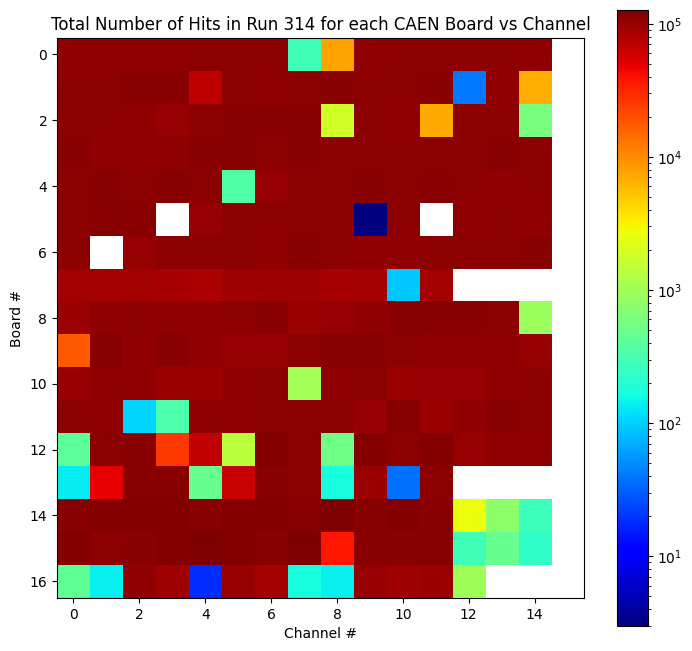

nMuonHits nTotalHits nMuonHits/nTotalHits
236391.0 22503540.0 0.01050461394073999
Hits in B14C11-B15-C14
[[116310.   2547.    770.    273.]
 [115499.    289.    475.    228.]]


In [13]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "314"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
charge = rdf.AsNumpy(columns=["charge"])["charge"]

#print(len(charge[0]))
#print(nhit[0])

PMTHits = np.zeros([17,16])
#print(PMTHits.shape)
for iEvt in range(0,len(event_number)):
    #print(len(board[aEvt]),len(channel[aEvt]), nhit[aEvt])
    for iHit in range(0,len(board[iEvt])):
        #print(board[iEvt][iHit])
        PMTHits[board[iEvt][iHit],channel[iEvt][iHit]]=PMTHits[board[iEvt][iHit],channel[iEvt][iHit]]+1

plt.figure(figsize=(17/2,16/2))
plt.imshow(PMTHits, cmap='jet',norm=colors.LogNorm())
plt.title("Total Number of Hits in Run "+run_number+" for each CAEN Board vs Channel")
plt.xlabel("Channel #")
plt.ylabel("Board #")
plt.colorbar()
plt.show()

nMuonHits = np.sum(PMTHits[14:16,11:15])
nTotalHits= np.sum(PMTHits)
print("nMuonHits nTotalHits nMuonHits/nTotalHits")
print(nMuonHits,nTotalHits,nMuonHits/nTotalHits)
print("nhits in B14C11-B15-C14")
print(PMTHits[14:16,11:15])


### Now, let's see if we can get coincidences of the paddles.
The code opens the file, grab the branches<br>
Then it loops through each event.
Create a 2x3 array (for the 6 powered up muon paddles) for each event.
Then fill the array with whether or not a hit occur

In [23]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

run_number = "314"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
charge = rdf.AsNumpy(columns=["charge"])["charge"]

for iEvt in range(0,len(event_number)):
    MuonHits = np.zeros([2,3])
    for iHit in range(0,len(board[iEvt])):
        if(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 12):
           MuonHits[0,0]=1
        if(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 13):
           MuonHits[0,1]=1
       
        if(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 14):
           MuonHits[0,2]=1

        if(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 12):
           MuonHits[1,0]=1
        
        if(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 13):
           MuonHits[1,1]=1
       
        if(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 14):
           MuonHits[1,2]=1


    if(MuonHits[1,0] or MuonHits[1,2]):
        if(MuonHits[1,1] or MuonHits[0,2]):
            print("Double!",iEvt)
            if(MuonHits[0,0] or MuonHits[0,1]):
                print("Triple!",iEvt)

    


Double! 1014
Double! 6099
Double! 8588
Double! 16826
Double! 32381
Double! 33544
Double! 46757
Double! 87348
Double! 109366
Double! 112885
Double! 129454
Double! 143183
Double! 176486
Double! 200019
Double! 224787
Double! 227238
Double! 232597
Double! 249978
Double! 319009
Double! 321060
Double! 345565
Double! 363484
Double! 403494
Double! 406236
